# Notebook SVR
<a name='haut'> </a>

In [1]:
# Décommenter à la première utilisation du notebook, puis commenter ensuite
#!pip3 install sklearn

Il est également possible, en changeant les fonctions de perte,  d'utiliser les SVM  en régression non paramétrique (SVR : Support Vector Regression)
, i.e. approcher une fonction de $\mathbb{R}^d$ dans $\mathbb{R}^p$ par les mêmes mécanismes d'optimisation. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
def set_default(figsize=(7, 4), dpi=100):

    plt.style.use(['fivethirtyeight'])

    plt.rc('figure', figsize=figsize,dpi=dpi)
    plt.rcParams['axes.labelsize'] = 12
        
    plt.rcParams['text.color'] = 'black'

    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.rcParams['savefig.bbox'] = 'tight'
    plt.rcParams['legend.frameon'] = False
    
    plt.rc('font', family='serif')

def set_aspect(ax):
    options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['right'].set_position(('data', -1))
    ax.spines['top'].set_position(('data', -1))
    ax.set_aspect('equal')
    ax.grid(True,ls=':')


## Tendance linéaire
Pour illustrer les SVR, on génère des données aléatoires 2D à tendance linéaire et on utilise LinearSVR pour effectuer une régression linéaire. 

<a name='donnees'></a>

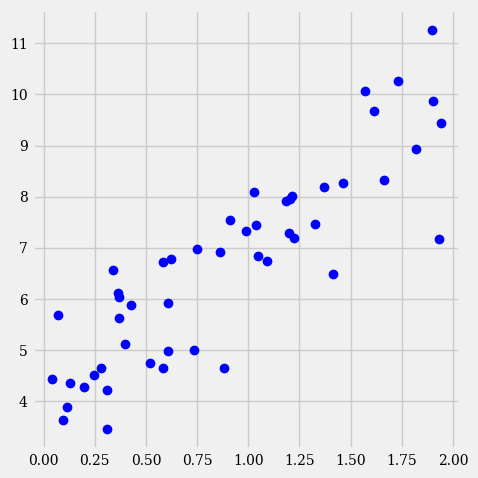

In [4]:
set_default()
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(X, y,"bo");
plt.tight_layout()

Un SVR linéaire est principalement défini par le paramètre $\epsilon$, qui spécifie la largeur du tube dans lequel aucune pénalité n'est associée.

In [5]:
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Affichage des régresseurs linéaires

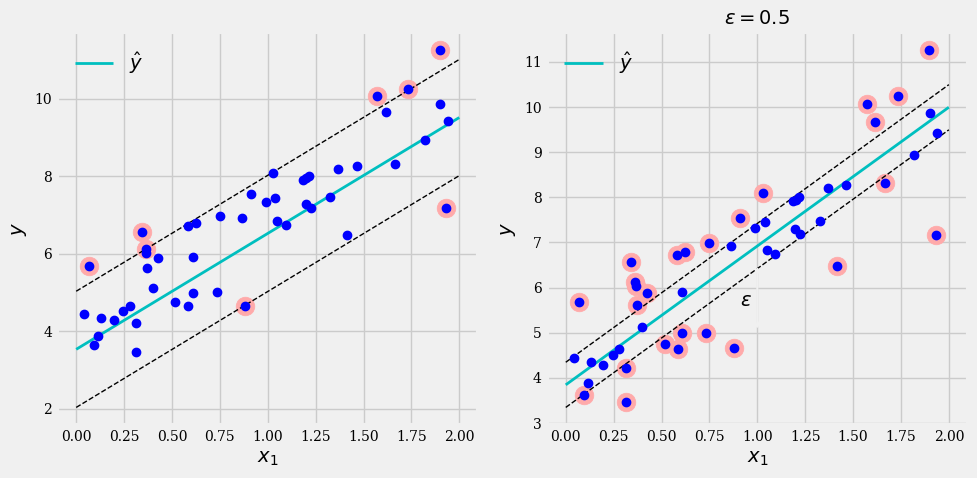

In [6]:
def plot_svm_regression(svm_reg, ax,X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    ax.plot(x1s, y_pred, "c-", linewidth=2, label=r"$\hat{y}$")
    ax.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    ax.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    ax.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    ax.plot(X, y, "bo")
    ax.set_xlabel(r"$x_1$", fontsize=14)
    ax.set_ylabel(r"$y$", fontsize=14)
    ax.legend(loc="upper left", fontsize=14)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_svm_regression(svm_reg1, ax[0],X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=14)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=14)
plot_svm_regression(svm_reg2,ax[1], X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=14)
plt.tight_layout()


## Tendance quadratique
On génère maintenant des données aléatoires 2D à tendance quadratique et on utilise un SVR polynomial pour la régression

In [7]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (2 * X *X + np.random.randn(m, 1)).ravel()

Un SVR polynomial est défini, outre par le paramètre $\epsilon$ précisé précedemment, par le degré. Ici on impose $d=2$, et on fait varier le paramètre de régularisation du modèle $C$

In [8]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1,gamma='auto')
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1,gamma='auto')
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)


SVR(C=0.01, degree=2, gamma='auto', kernel='poly')

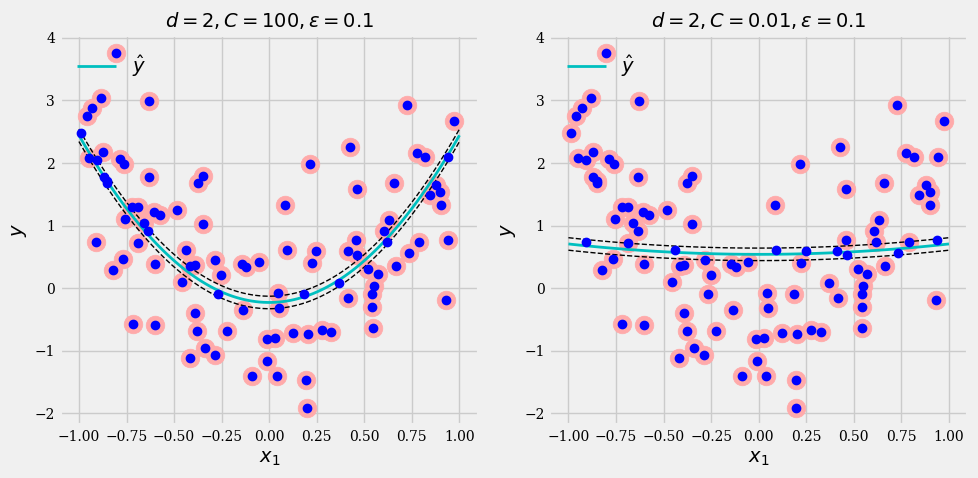

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plot_svm_regression(svm_poly_reg1, ax[0],X, y, [-1, 1, 0, 1])
ax[0].set_title(r"$d={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, 
                                                svm_poly_reg1.epsilon),fontsize=14)
ax[0].set_ylabel(r"$y$", fontsize=14)
plot_svm_regression(svm_poly_reg2,ax[1], X, y, [-1, 1, 0, 1])
ax[1].set_title(r"$d={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, 
                                                svm_poly_reg2.epsilon),fontsize=14)
plt.tight_layout()
